# Model Building

Let's compare the logistic regression with all variables and only the selected variables with p < 0.25 in the univariate analysis.

Warning message:
"package 'tidyverse' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'caret' was built under R version 3.6.1"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'MLmetrics' was built under R version 3.6.1"
Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is 

model,mean,median,sd
full model,0.9035265,0.9195804,0.06323870
selected model,0.9084715,0.9195804,0.05731126


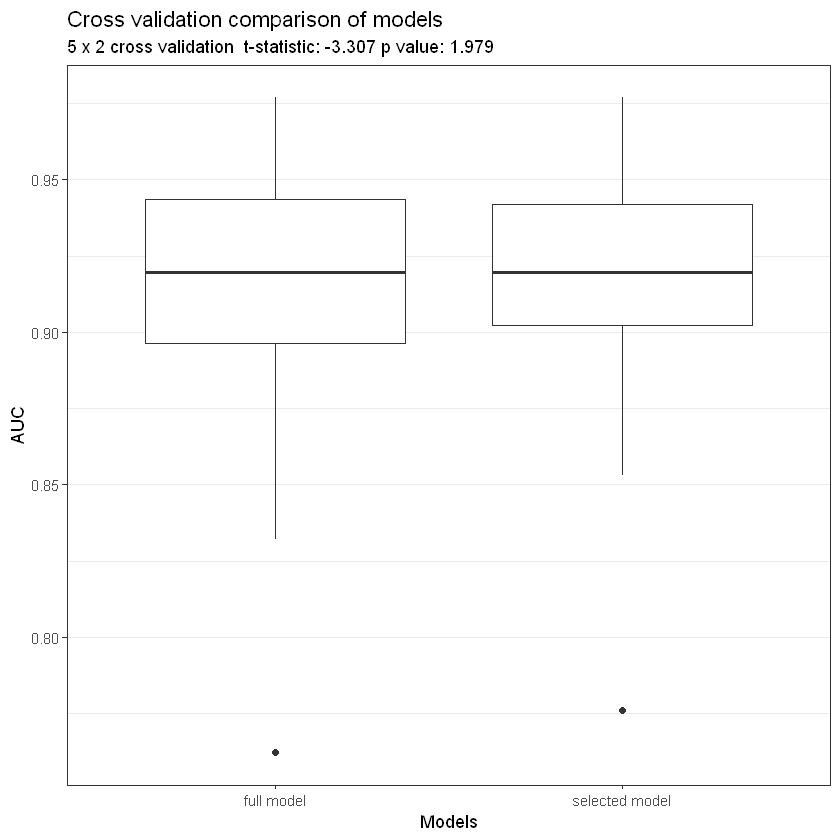

In [1]:
source("helpers.r")

learner_A <- function(training, test) {
  name <- "full model"

  fit <- glm(target ~ ., data=training, family =binomial(link = "logit"))
  y_probabilities <- predict(fit, test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
    
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}

learner_B <- function(training, test) {
  name <- "selected model"
  
  fit <- glm(target ~ thal + cp + oldpeak + exang +thalach + ca + slope 
             + sex + age + restecg + trestbps, data=training, family =binomial(link = "logit"))
  y_probabilities <- predict(fit, test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
    
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}


result <- cross_validation_selection(learner_A, learner_B)

result$model_result %>%
   group_by(model) %>%
   summarize(mean = mean(auc),
             median = median(auc),
             sd = sd(auc))

plot_result(result)

Not a real difference in the performance. Let's compare the coefficients of the multivariate model vs the coefficients of the model fit with only one variable (yes i probably should have use a loop for this task):

In [2]:
library(broom)
df  <- get_training_df_clean()

fit  <- fit <- glm(target ~ thal + cp + oldpeak + exang +thalach + ca + slope 
             + sex + age + restecg + trestbps, data=df, family =binomial(link = "logit"))
fit_multi  <- tidy(fit)

fit_uni  <- tibble(term = vector(mode = "character"),
                  estimate = vector(mode = "numeric"),
                  p.value = vector(mode = "numeric"))

fit  <- glm(target ~ thal, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ cp, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ oldpeak, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ exang, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ thalach, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ ca, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ slope, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ sex, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ age, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ restecg, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit  <- glm(target ~ trestbps, data=df, family =binomial(link = "logit"))
fit_uni  <-  tidy(fit) %>%  
    filter(term != "(Intercept)")  %>%
    bind_rows(fit_uni)

fit_multi %>% 
    inner_join(fit_uni, by = c("term"), suffix = c("_multi", "_uni")) %>%
    select(term, estimate_multi, estimate_uni, p.value_multi, p.value_uni)


Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


term,estimate_multi,estimate_uni,p.value_multi,p.value_uni
thalreversable_defect,0.422800839,2.13268606,6.608580e-01,8.209703e-04
thal?,-1.465726151,-0.36070721,1.275931e-01,5.781061e-01
cpatypical_angina,1.257834436,2.54091233,6.524662e-02,4.865328e-08
cpnon-anginal_pain,2.570080937,2.36580451,1.783612e-05,2.719392e-10
cpasymptomatic,2.122182272,1.57950116,3.541295e-03,2.127241e-03
oldpeak,-0.599547560,-0.97374500,2.405477e-02,1.000051e-09
exangyes,-0.583493887,-1.82502356,2.295058e-01,3.972891e-09
thalach,0.011437349,0.04621467,3.452869e-01,1.272006e-09
ca,-1.152046445,-1.00825182,1.099606e-05,1.398668e-08
slopeflat,-1.091363948,-0.35065687,2.729458e-01,4.950140e-01


Hosmer suggest to only include those variables in the model, which p value is significant. Look at this:


In [3]:
fit <- glm(target ~ thal + cp + oldpeak + exang +thalach + ca + slope 
             + sex + age + restecg + trestbps, data=df, family =binomial(link = "logit"))
fit_tidy  <- tidy(fit)
fit_tidy %>% 
    filter(p.value < 0.05)

term,estimate,std.error,statistic,p.value
cpnon-anginal_pain,2.5700809,0.5990323,4.290388,1.783612e-05
cpasymptomatic,2.1221823,0.7276792,2.916371,3.541295e-03
oldpeak,-0.5995476,0.2657271,-2.256253,2.405477e-02
ca,-1.1520464,0.2620313,-4.396598,1.099606e-05


So let's check the performance of this model:

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)
Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


model,mean,median,sd
selected model,0.9084715,0.9195804,0.05731126
selected significant model,0.8707243,0.8741259,0.05160244


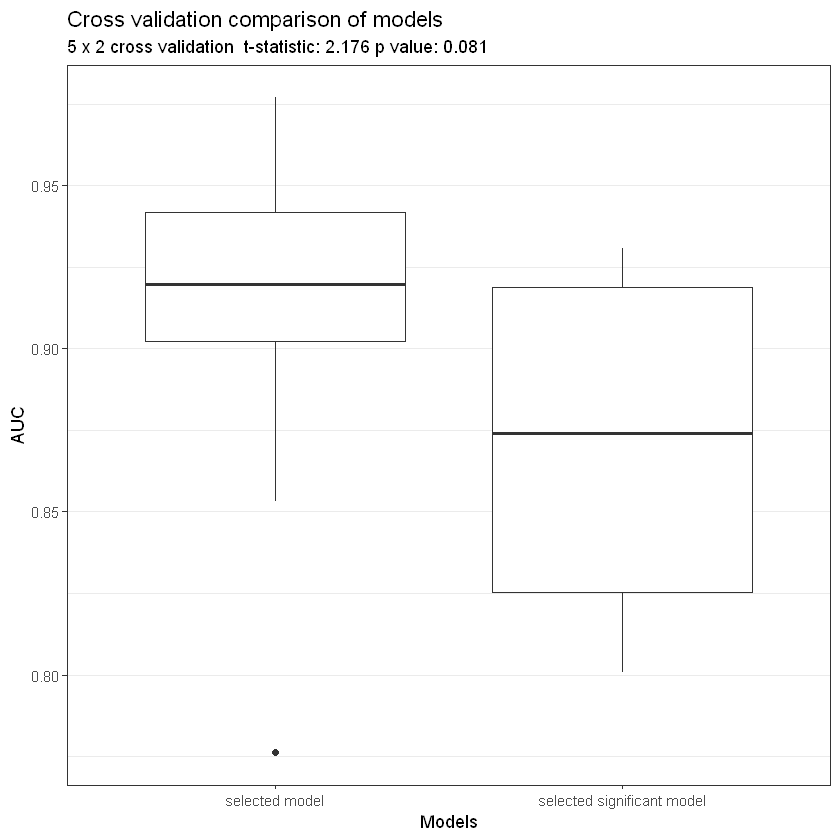

In [4]:
learner_A <- function(training, test) {
  name <- "selected model"
  
  fit <- glm(target ~ thal + cp + oldpeak + exang +thalach + ca + slope 
             + sex + age + restecg + trestbps, data=training, family =binomial(link = "logit"))
  y_probabilities <- predict(fit, test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
    
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}

learner_B <- function(training, test) {
  name <- "selected significant model"
  
  fit <- glm(target ~ cp + oldpeak + ca, data=training, family =binomial(link = "logit"))
  y_probabilities <- predict(fit, test,  type="response")
  y_true <- ifelse(test$target == "no_disease", 0, 1)
    
  auc <- AUC(y_true = y_true, y_pred = y_probabilities)
  return(list(name = name, auc = auc))
}


result <- cross_validation_selection(learner_A, learner_B)

result$model_result %>%
   group_by(model) %>%
   summarize(mean = mean(auc),
             median = median(auc),
             sd = sd(auc))

plot_result(result)

It is not so good. Let's check for interactions: 

In [5]:
fit <- glm(target ~ cp * oldpeak + ca, data=df, family =binomial(link = "logit"))
tidy(fit)

term,estimate,std.error,statistic,p.value
(Intercept),0.6538219,0.3442500,1.8992648,5.752966e-02
cpatypical_angina,2.3974764,0.7580128,3.1628442,1.562359e-03
cpnon-anginal_pain,3.9326913,0.8856111,4.4406529,8.968637e-06
cpasymptomatic,0.5643062,0.9013901,0.6260400,5.312887e-01
oldpeak,-0.9670734,0.3029024,-3.1926896,1.409544e-03
ca,-1.1209071,0.2230315,-5.0257790,5.013930e-07
cpatypical_angina:oldpeak,-0.5853009,0.8655464,-0.6762213,4.989002e-01
cpnon-anginal_pain:oldpeak,-1.0760259,0.6114607,-1.7597631,7.844798e-02
cpasymptomatic:oldpeak,0.9365780,0.5448595,1.7189348,8.562624e-02


In [6]:
fit <- glm(target ~ cp * ca + oldpeak , data=df, family =binomial(link = "logit"))
tidy(fit)

term,estimate,std.error,statistic,p.value
(Intercept),0.9967867,0.3482025,2.862664,4.200956e-03
cpatypical_angina,1.5733095,0.6305173,2.495268,1.258621e-02
cpnon-anginal_pain,1.8992284,0.5331183,3.562489,3.673550e-04
cpasymptomatic,1.8163447,0.7757312,2.341461,1.920842e-02
ca,-2.0639765,0.5660856,-3.646050,2.663020e-04
oldpeak,-1.0255939,0.2131832,-4.810856,1.502852e-06
cpatypical_angina:ca,1.2019637,0.7021286,1.711885,8.691779e-02
cpnon-anginal_pain:ca,1.4710453,0.6315990,2.329081,1.985477e-02
cpasymptomatic:ca,0.9666088,0.9058451,1.067080,2.859359e-01
